# Major Project 

single linear regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [2]:
data = pd.read_excel(
    r"C:\Users\Hitesh\Desktop\Major Project 2022\Dataset (1).xlsx")
data.head(10)

,X,Y,Temperature
0,3,2,74
1,6,2,70
2,9,2,62
3,12,2,61
4,15,2,70
5,18,2,69
6,21,2,72
7,3,4,78
8,6,4,69
9,9,4,68


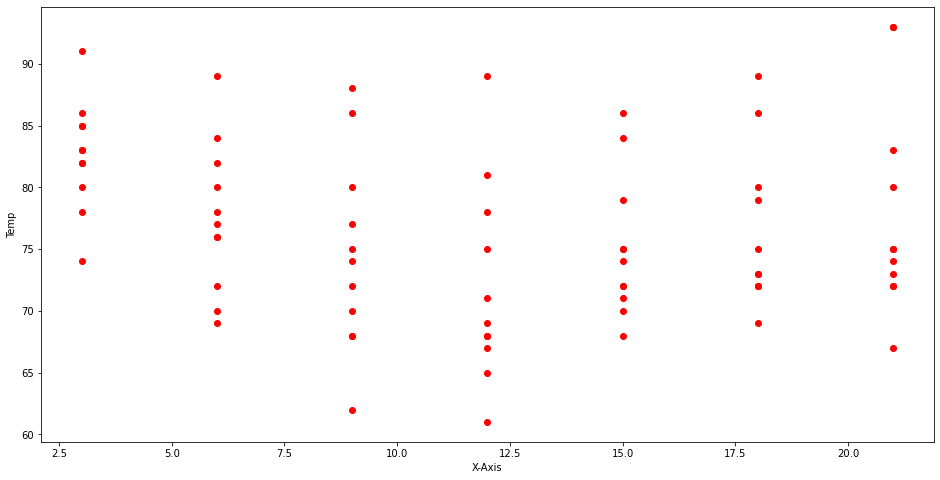

In [3]:
plt.figure(figsize=(16,8))
plt.scatter(
    data['X'],
    data['Temperature'],
    c='red'
)
plt.xlabel('X-Axis')
plt.ylabel('Temp')
plt.show()

In [4]:
x = data['X'].values.reshape(-1,1)
y = data['Temperature'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [5]:
print(reg.coef_[0][0])
print(reg.intercept_[0])

print("The linear model is Y = {:.5} + ({:.5})X"
    .format(reg.intercept_[0],reg.coef_[0][0]))


-0.19047619047619052
78.87012987012987
The linear model is Y = 78.87 + (-0.19048)X


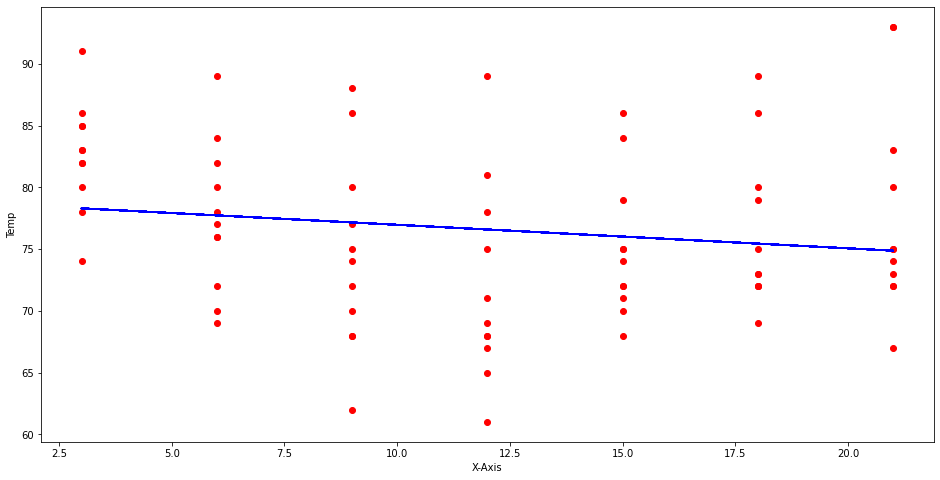

In [6]:
predictions = reg.predict(x)

plt.figure(figsize=(16,8))
plt.scatter(
    data['X'],
    data['Temperature'],
    c='red'
)

plt.plot(
    data['X'],
    predictions,
    c = 'blue'
    
)

plt.xlabel('X-Axis')
plt.ylabel('Temp')
plt.show()

In [7]:
x = data['X']
y = data['Temperature']

X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.918
Date:                Mon, 11 Jul 2022   Prob (F-statistic):              0.170
Time:                        20:19:17   Log-Likelihood:                -260.68
No. Observations:                  77   AIC:                             525.4
Df Residuals:                      75   BIC:                             530.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.8701      1.845     42.745      0.0

Multiple linear regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

data = pd.read_excel(
    r"C:\Users\Hitesh\Desktop\Major Project 2022\Dataset (1).xlsx", 
        sheet_name="Sheet1")
data.head()

xs = data.drop(['Temperature'],axis=1)
y = data['Temperature'].values.reshape(-1,1)



In [9]:
xs = data.drop(['Temperature'],axis=1)
y = data['Temperature'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(xs,y)
xs

,X,Y
0,3,2
1,6,2
2,9,2
3,12,2
4,15,2
...,...,...
72,9,22
73,12,22
74,15,22
75,18,22


In [10]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


x_train, x_test, y_train, y_test = train_test_split(
    xs , y ,test_size = 0.2, random_state = 111)

LR = LinearRegression()
LR.fit(x_train,y_train)

y_prediction =  LR.predict(x_test)
y_prediction


score=r2_score(y_test,y_prediction)
print("r2 socre is " + str(score))

r2 socre is 0.8074435985744436


In [11]:
reg.predict([[3,14]])

array([[80.06103896]])

In [12]:
s = pd.read_excel(
    r"C:\Users\Hitesh\Desktop\Major Project 2022\Dataset.xlsx",
    sheet_name='Sheet2')

s['Pred_Temp']=reg.predict(s)
s.head(20)

,X,Y,Pred_Temp
0,3,2,69.487013
1,6,2,68.915584
2,9,2,68.344156
3,12,2,67.772727
4,15,2,67.201299
5,18,2,66.629870
6,21,2,66.058442
7,3,4,71.249351
8,6,4,70.677922
9,9,4,70.106494


In [13]:
print(reg.coef_)
print(reg.intercept_)

[[-0.19047619  0.88116883]]
[68.2961039]


In [14]:
print("The linear model is: Y = {:.5} + {:.5}*X + {:.5}*Y"
.format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1],))


The linear model is: Y = 68.296 + -0.19048*X + 0.88117*Y


In [15]:
reg.score(xs,y)

0.6179638539472754

In [16]:
x = np.column_stack((data['X'],data['Y']))
y = data['Temperature']

X2 = sm.add_constant(x)
est = sm.OLS(y,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     59.85
Date:                Mon, 11 Jul 2022   Prob (F-statistic):           3.45e-16
Time:                        20:19:18   Log-Likelihood:                -224.61
No. Observations:                  77   AIC:                             455.2
Df Residuals:                      74   BIC:                             462.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.2961      1.525     44.788      0.0

MAE: 2.7981587906708896
RMSE: 3.4846933961109334


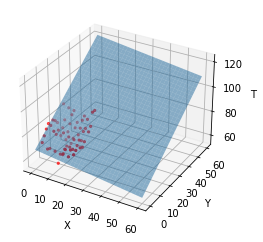

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model

from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    x_train.iloc[:,0], x_train.iloc[:,1], y_train, 
    marker='.', color='red')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("T")

model = sklearn.linear_model.LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("MAE: {}"
.format(np.abs(y_test-y_pred).mean()))
print("RMSE: {}"
.format(np.sqrt(((y_test-y_pred)**2).mean())))

coefs = model.coef_
intercept = model.intercept_
xs = np.tile(np.arange(61), (61,1))
ys = np.tile(np.arange(61), (61,1)).T
zs = xs*reg.coef_[0][0]+ys*reg.coef_[0][1]+reg.intercept_

ax.plot_surface(xs,ys,zs, alpha=0.5)
plt.show()


In [20]:
from tkinter import *


root = Tk()
root.geometry('500x500')
root.resizable(0,0)
root.title("Temp Prediction")
root.config(bg='#798dad')


user_take1 = StringVar()
user_take2 = StringVar()


Label(root,text='''RNS Institute of Technology
Mechanical Department''',
font='TimesNewRoman 20 bold',
bg='#798dad').place(x=60,y=20)

Label(root,text='Input X Coordinate',
font='TimesNewRoman 16 bold', 
bg='#798dad').place(x=60,y=100)

Entry(root,
font='TimenNewRoman 15',textvariable = user_take1,
bg='#dce7f7').place(x=110,y=150)

Label(root,text='Input Y Coordinate',
font='TimesNewRoman 16 bold',
 bg='#798dad').place(x=60,y=190)

Entry(root,font='TimenNewRoman 15',
textvariable = user_take2,
bg='#dce7f7').place(x=110,y=240)


result = StringVar()
def Predict():
    a = user_take1.get()
    b = user_take2.get()
    r = reg.predict([[a,b]])
    result.set(r[0][0])


def Reset():
    result#fafbfc'
    user_take1.set("")
    user_take2.set("")
    result.set("")
    


def Exit():
    root.destroy()


Entry(root, font = 'arial 10 bold', 
textvariable = result, bg ='antiquewhite2',
width = 50,).place(x=60, y = 350)


Button(root, font = 'arial 13 bold',
text = 'PREDICT'  ,padx =5,bg ='seashell4' ,
command = Predict).place(x=170,y=290)


Button(root, font = 'arial 13 bold',
text = 'RESET'  ,padx =5,bg ='seashell4' ,
command = Reset).place(x=110,y=400)


Button(root, font = 'arial 13 bold', 
text = 'EXIT'  ,padx =5,bg ='seashell4' ,
command = Exit).place(x=260,y=400)

root.mainloop()

c:\Users\Hitesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
